<h1> Telescope Diffraction Limit </h1>
<p> Calculating the diffraction pattern due to the finite aperture of a telescope</p>

<h5>Point Spred Function is the squared amplitude of the Fourier transform of the complex pupil function:</h5>

$P(x,y) = P_r (x,y) e^{\frac{-i 2 \pi W}{\lambda}}$

<h5> Or more specifically: </h5>

$ PSF (x_f, y_f) = FT [P(x,y)] \left( k_x = \frac{x_f}{\lambda f} , k_y = \frac{y_f}{\lambda f} \right)$

$\frac{\Delta x}{\Delta \theta} = f$

<h5> In the simplest case:</h5>

$P(r, \theta)$ is just 1 within some radius $D/2$, and 0 outside. The image formed in this case is:

$I = C \left( \frac{J_1 (\pi r_f)}{\pi r_f} \right)^2$

Where $J_1$ is the first-order Bessel function, $r_f = D \theta / \lambda$

<h2> Importing Libraries</h2>

![Alt text](image.png)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

<h2> Defining Functions </h2>

In [12]:
def J_1_numpy(input_x):
    a = 0
    b = np.pi
    N = 256
    x = np.linspace(a,b,N)
    y = (1/np.pi)*np.cos(x - input_x*np.sin(x))
    return integrate.simpson(y,x)
    

<h2> Testing Code </h2>

In [10]:
print(J_1_numpy(2))

0.5767248110565983


![Alt text](image-2.png)

Wolfram Alpha output

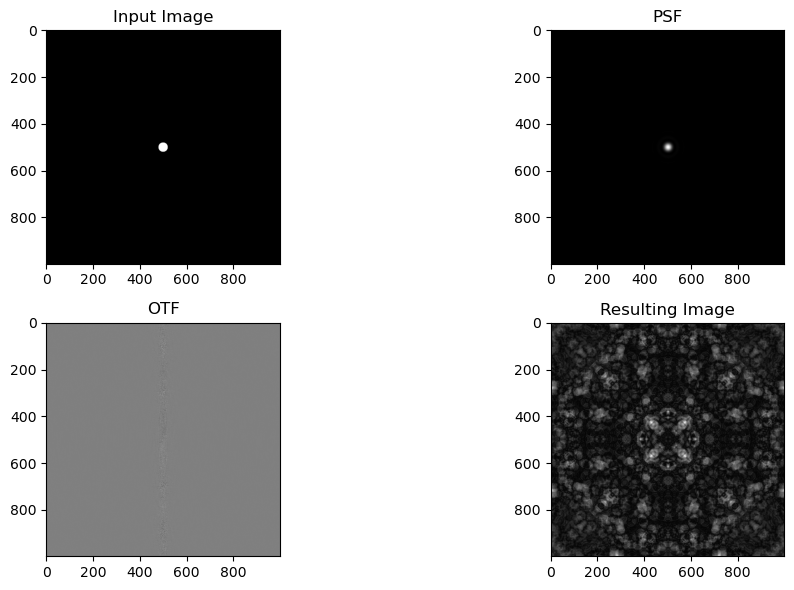

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d

# Define the parameters
image_size = 1000  # Size of the image in pixels
circle_radius = 20  # Radius of the dark circle in pixels
wavelength = 0.5  # Wavelength of light (in arbitrary units)
pixel_size = 1.0  # Size of a pixel in arbitrary units

# Create a dark circle in the center of the image
image = np.zeros((image_size, image_size))
y, x = np.indices((image_size, image_size))
circle_mask = (x - image_size // 2) ** 2 + (y - image_size // 2) ** 2 <= circle_radius ** 2
image[circle_mask] = 1

# Compute the Point Spread Function (PSF)
psf = np.abs(fftshift(fft2(image))) ** 2

# Compute the Optical Transfer Function (OTF)
otf = np.exp(-1j * 2 * np.pi * wavelength * pixel_size * fftshift(fft2(image)))

# Compute the resulting image using convolution
result_image = np.abs(ifft2(ifft2(otf) * fft2(image)))

# Plot the input image, PSF, OTF, and the resulting image
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Input Image')

# plt.subplot(2, 2, 2)
# plt.imshow(np.log10(psf), cmap='gray')
# plt.title('Log PSF')

plt.subplot(2, 2, 2)
plt.imshow(psf, cmap='gray')
plt.title('PSF')

plt.subplot(2, 2, 3)
plt.imshow(np.abs(otf), cmap='gray')
plt.title('OTF')

plt.subplot(2, 2, 4)
plt.imshow(result_image, cmap='gray')
plt.title('Resulting Image')

plt.tight_layout()
plt.show()

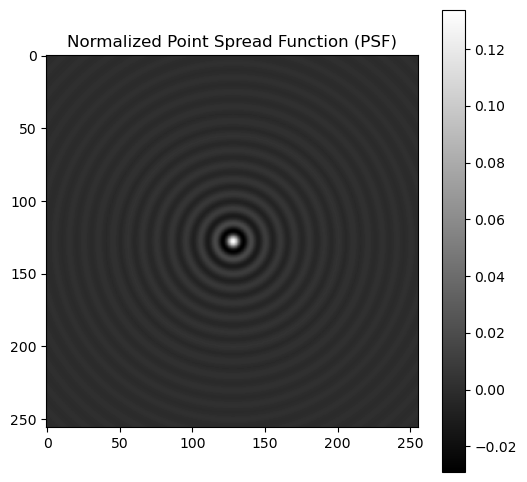

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift
from scipy.integrate import simps

# Custom Bessel function J_1 integration
def J_1_numpy(input_x):
    a = 0
    b = np.pi
    N = 256
    x = np.linspace(a, b, N)
    y = (1/np.pi) * np.cos(x - input_x * np.sin(x))
    return simps(y, x)

# Define parameters
image_size = 256
wavelength = 0.5
pixel_size = 1.0
D = 1.0
theta = 0.1  # Example angular size in radians

# Calculate rf using the formula: rf = D * theta / wavelength
rf = D * theta / wavelength

# Calculate the normalization constant using the custom J_1 integration
normalization_constant = J_1_numpy(np.pi * rf)

# Create a coordinate grid for the PSF
x = np.linspace(-image_size // 2, image_size // 2 - 1, image_size)
y = np.linspace(-image_size // 2, image_size // 2 - 1, image_size)
x, y = np.meshgrid(x, y)

# Calculate the PSF using the Airy disk formula
r = np.sqrt(x**2 + y**2)
airy_disk = (1.0 / np.pi) * (rf / (r + 1e-10)) * np.sin(np.pi * rf * (r + 1e-10))

# Normalize the PSF by dividing it by the normalization constant
airy_disk /= normalization_constant

# Plot the normalized PSF
plt.figure(figsize=(6, 6))
plt.imshow(airy_disk, cmap='gray')
plt.title('Normalized Point Spread Function (PSF)')
plt.colorbar()
plt.show()

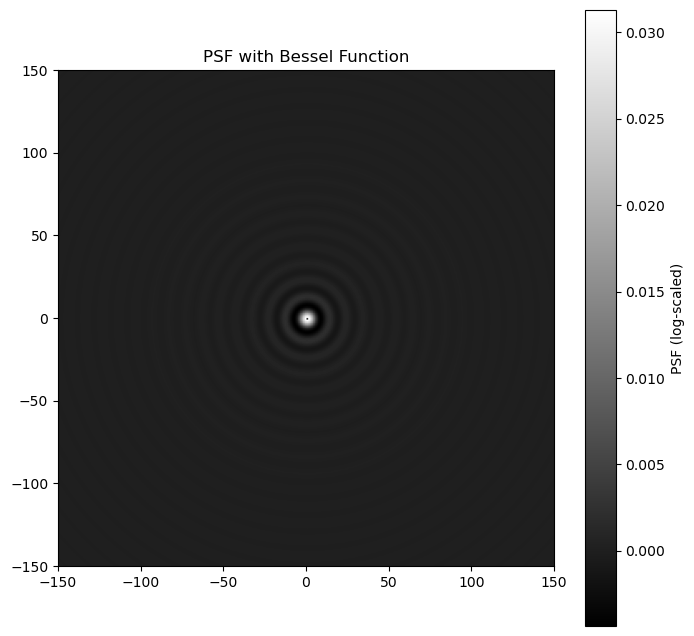

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1  # Import Bessel function J_1

# Define parameters
image_size = 300  # Increase image size for better accuracy
wavelength = 0.5
pixel_size = 1.0
D = 1.0
theta = 0.1  # Example angular size in radians

# Calculate rf using the formula: rf = D * theta / wavelength
rf = D * theta / wavelength

# Create a coordinate grid for the PSF with increased size
x = np.linspace(-image_size // 2, image_size // 2 - 1, image_size)
y = np.linspace(-image_size // 2, image_size // 2 - 1, image_size)
x, y = np.meshgrid(x, y)

# Calculate the radial distance r from the center
r = np.sqrt(x**2 + y**2)

# Calculate the Bessel function component in 2D
bessel_component = j1(np.pi * rf * r)

# Calculate the PSF using the Airy disk formula with the Bessel component
airy_disk = (1.0 / np.pi) * (rf / (r + 1e-10)) * bessel_component

# Normalize the PSF by dividing it by the normalization constant
normalization_constant = np.sum(airy_disk)
airy_disk /= normalization_constant

# Plot the normalized PSF on a logarithmic scale
plt.figure(figsize=(8, 8))
plt.imshow(airy_disk, cmap='gray', extent=[-image_size//2, image_size//2, -image_size//2, image_size//2])
plt.title('PSF with Bessel Function')
plt.colorbar(label='PSF (log-scaled)')
plt.show()

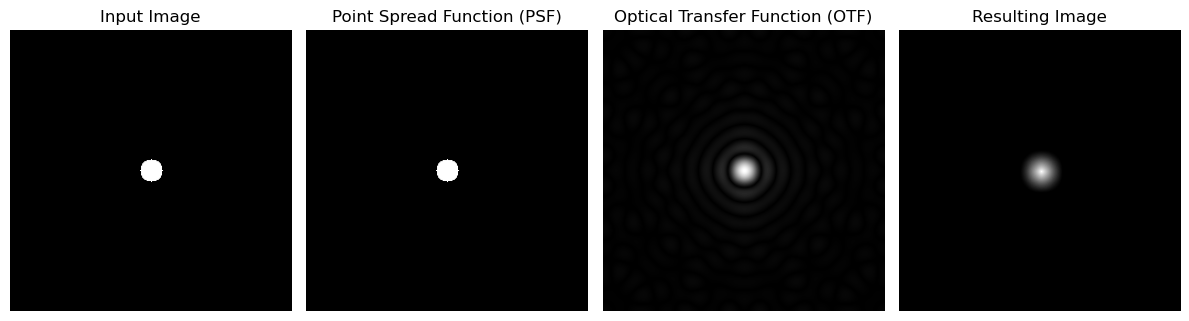

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

# Define the size of the image and circle parameters
image_size = 256  # Adjust as needed
circle_radius = 10

# Create a dark circle input
input_image = np.zeros((image_size, image_size))
circle_center = (image_size // 2, image_size // 2)
for i in range(image_size):
    for j in range(image_size):
        if (i - circle_center[0])**2 + (j - circle_center[1])**2 <= circle_radius**2:
            input_image[i, j] = 1

# # Define the PSF (assuming a simple circular aperture)
# def generate_psf(size, radius):
#     psf = np.zeros((size, size))
#     center = (size // 2, size // 2)
#     for i in range(size):
#         for j in range(size):
#             distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
#             if distance <= radius:
#                 psf[i, j] = 1 / np.pi / radius**2  # Normalize to integrate to 1
#     return psf

def generate_psf(size, radius):
    # Create a grid of coordinates
    x, y = np.meshgrid(np.arange(size), np.arange(size))
    center = (size // 2, size // 2)
    
    # Calculate the distance from each point to the center
    distance = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    
    # Create the PSF as a boolean mask and normalize
    psf = (distance <= radius).astype(float) / (np.pi * radius**2)
    
    return psf

def generate_psf_cassegian(size, outer_radius, inner_radius):
    # Create a grid of coordinates
    x, y = np.meshgrid(np.arange(size), np.arange(size))
    center = (size // 2, size // 2)
    
    # Calculate the distance from each point to the center
    distance = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    
    # Create the PSF as a boolean mask with two circles (inner and outer) and normalize
    inner_circle = (distance <= inner_radius).astype(float)
    outer_circle = (distance <= outer_radius).astype(float)
    psf = (outer_circle - inner_circle) / (np.pi * (outer_radius**2 - inner_radius**2))
    
    return psf


# Generate the PSF
psf = generate_psf(image_size, circle_radius)

# Generate the PSF Cassegian
generate_psf_cassegian = generate_psf_cassegian

# Compute the OTF (Optical Transfer Function) using the Fourier Transform of the PSF
otf = np.fft.fftshift(np.fft.fft2(psf))

# Convolve the input image with the PSF using FFT convolution
output_image = fftconvolve(input_image, psf, mode='same')

# Plot the input image, PSF, OTF, and output image
plt.figure(figsize=(12, 4))
plt.subplot(141)
plt.imshow(input_image, cmap='gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(psf, cmap='gray')
plt.title('Point Spread Function (PSF)')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.abs(otf), cmap='gray')
plt.title('Optical Transfer Function (OTF)')
plt.axis('off')

plt.subplot(144)
plt.imshow(output_image, cmap='gray')
plt.title('Resulting Image')
plt.axis('off')

plt.tight_layout()
plt.show()